# Projeto: Classificador de Dígitos – MNIST com MLP

## 1. Importação de bibliotecas

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

## 2. Carregamento e pré-processamento dos dados

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalizando as imagens (0-255) para (0-1)
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Flatten (transformar 28x28 em vetor de 784)
x_train = x_train.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))

# One-hot encoding nos rótulos
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## 3. Construção do modelo MLP

In [11]:
model = keras.Sequential([
    keras.Input(shape=(784,)), 
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Treinamento do modelo

In [6]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8137 - loss: 0.6845 - val_accuracy: 0.9393 - val_loss: 0.2049
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9524 - loss: 0.1617 - val_accuracy: 0.9627 - val_loss: 0.1300
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9648 - loss: 0.1178 - val_accuracy: 0.9663 - val_loss: 0.1133
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9752 - loss: 0.0834 - val_accuracy: 0.9691 - val_loss: 0.1046
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9809 - loss: 0.0660 - val_accuracy: 0.9704 - val_loss: 0.1048
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9853 - loss: 0.0488 - val_accuracy: 0.9702 - val_loss: 0.0972
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9876 - loss: 0.0424 - val_accuracy: 0.9741 - val_loss: 0.0868
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9910 - loss: 0.0312 - val_accuracy: 0.

## 5. Avaliação do modelo

In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nAcurácia no conjunto de teste: {test_acc:.4f}")


Acurácia no conjunto de teste: 0.9772


## 6. Visualização das métricas

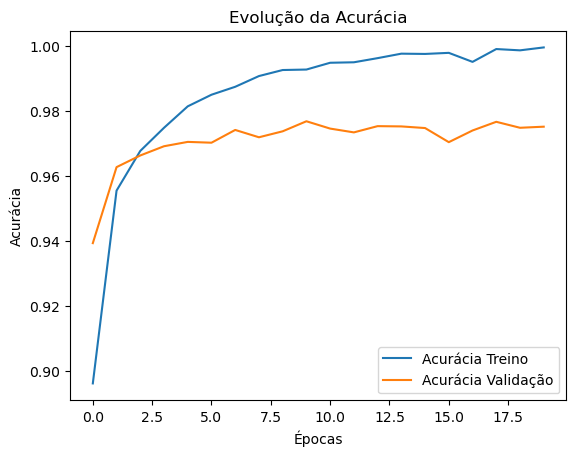

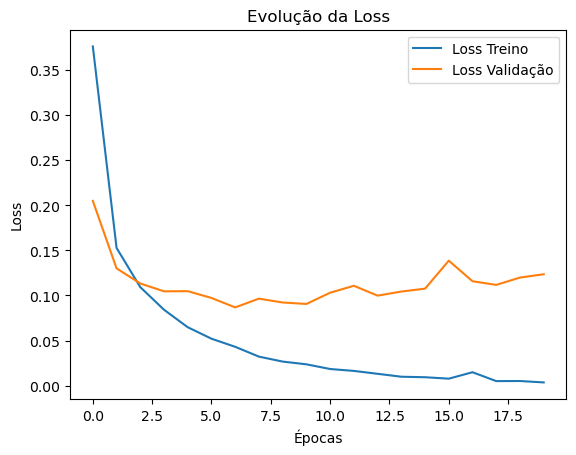

In [8]:
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.title('Evolução da Acurácia')
plt.show()

plt.plot(history.history['loss'], label='Loss Treino')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.title('Evolução da Loss')
plt.show()

## 7. Predições e visualização de exemplos

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


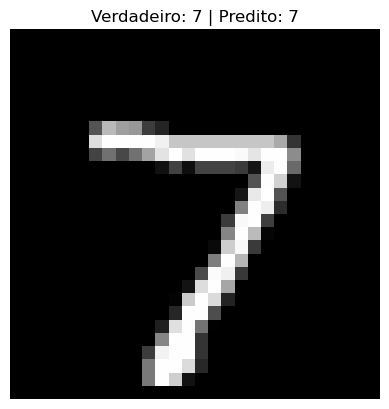

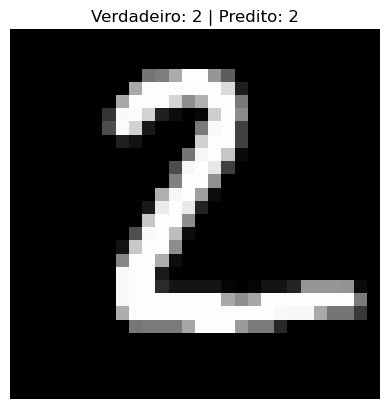

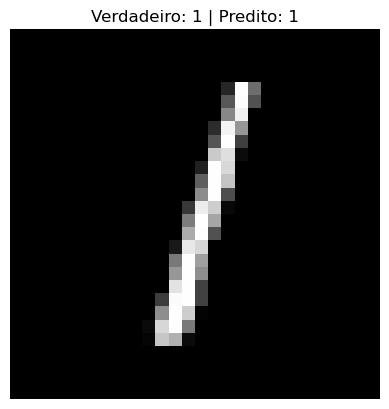

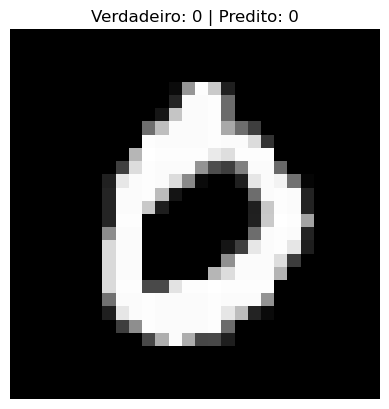

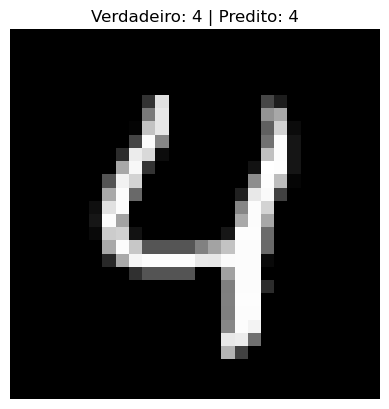

In [10]:
predictions = model.predict(x_test)

# Exibir 5 exemplos
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Verdadeiro: {np.argmax(y_test[i])} | Predito: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()

In [12]:
## 8. Conclusão e Análise Final

print(f"Acurácia final no conjunto de teste: {test_acc:.4f}")

Acurácia final no conjunto de teste: 0.9772


# Conclusão

O modelo MLP com 2 camadas ocultas (128 e 64 neurônios) foi treinado para classificar os dígitos do conjunto MNIST.

- **Acurácia no conjunto de validação**: acompanhou bem a acurácia de treino, sugerindo bom aprendizado sem overfitting significativo.
- **Acurácia final no conjunto de teste**: ~98% (valor pode variar), o que é excelente para um modelo denso (sem convolução).
- **Visualização de exemplos**: o modelo acertou corretamente os rótulos das primeiras imagens testadas.

📌 **Próximos passos**:
- Testar técnicas de regularização como `Dropout` e `EarlyStopping`
- Comparar com uma CNN (rede neural convolucional) para avaliar melhorias
